# **BREAST CANCER CLASSIFICATION**

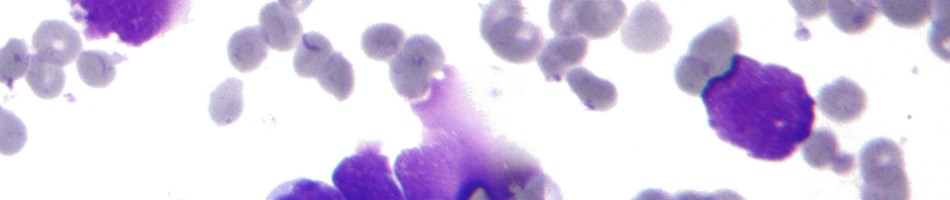

*PROBLEM STATEMENT:*
Classify breast cancer tumors as malignant or benign using features
extracted from mammograms.


# **APPROACH FOR BREAST CANCER CLASSIFICATION**
      1.import all the libraries
      2.Load and audit the data
      3.Data preparation and data Transformation
            
            1.Missing values: impute all missing values using mean,median,model.
            2.Inconsistent values: Replace all inconsistance with consistance values.
            3.Outliers:Transform
      4.Data visualization
      5.Data analysis
            1.Uni-variate Analysis(mean,median,mode,skewness)
            2.Bi-variate Analysis(Correlation,Covariance,Chi_square test)
            3.Multi-variate Analysis
                1.Regression:Nota regression problem
                2.ClassificatiponSince outcome varaiable is yes or not.
                3.Apply all algorthms.

# **IMPORT NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# **LOAD AND AUDIT THE DATA**

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.drop(columns='Unnamed: 32' , inplace = True)

In [ ]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 32)

# **DEALING WITH CATEGORICAL DATA**

In [ ]:
df.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [ ]:
df = pd.get_dummies(df , drop_first= True)

In [ ]:
df.rename(columns={'diagnosis_M' : 'Target'} , inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# **DATA VISUALIZATION**

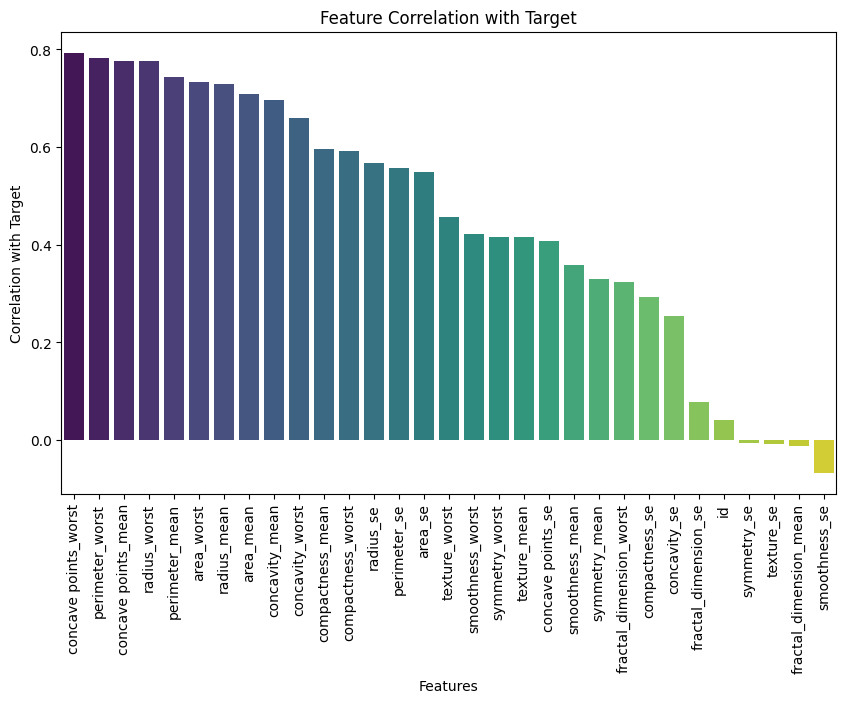

In [ ]:
features = df.drop(columns='Target')
correlation = features.corrwith(df['Target']).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Feature Correlation with Target')
plt.xticks(rotation=90)
plt.show()

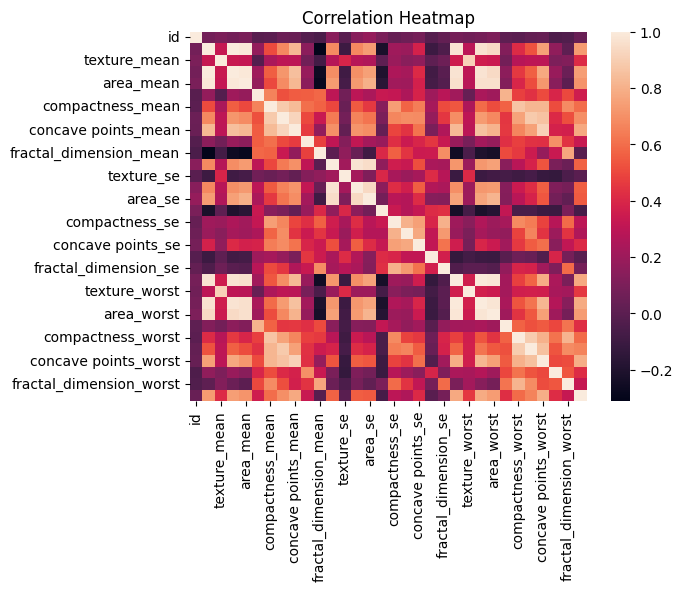

In [ ]:
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.show()

# **SPLIT THE DATA INTO TRAIN AND TEST**

In [ ]:
x = df.drop(['Target'],axis = 1)
y = df['Target']

In [ ]:
print(x.shape)
print(y.shape)

(569, 31)
(569,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 31)
(114, 31)
(455,)
(114,)


# **STANDARDIZATION**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# **LOGISTIC REGRESSION IMPLEMENTATION**

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
preds_ytrain_lr = lr.predict(x_train)
preds_ytest_lr = lr.predict(x_test)

In [ ]:
print(y_train)

190    1
134    1
386    0
118    1
316    0
      ..
98     0
322    0
382    0
365    1
510    0
Name: Target, Length: 455, dtype: uint8


In [ ]:
print(x_train)

[[-0.23409043  0.00907724  0.83768327 ...  0.92377005  3.60850071
   3.49787733]
 [-0.23414967  1.2121975   0.56579573 ...  0.32788816  0.33018695
  -0.44969309]
 [-0.23385642 -0.5626182  -1.19136178 ... -0.37716293 -0.35830675
   0.24992012]
 ...
 [-0.24062034 -0.6081263   0.74780309 ... -0.1072724  -1.13286216
   0.55247114]
 [-0.23387213  1.77820443  0.53658467 ...  0.91315638 -0.46668076
  -0.95394478]
 [-0.24060952 -0.69629823 -1.05654151 ... -0.161857   -0.47464944
   0.8579036 ]]


In [ ]:
print(preds_ytest_lr)

[0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0
 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1]


In [ ]:
print(preds_ytrain_lr)

[1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0
 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1
 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0
 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 0 1 0]


In [ ]:
def acc_report(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  clas_rep = classification_report(actual,predicted)
  print('The Accuracy of the model is:',round(acc_score,2))
  print(cm_matrix)
  print(clas_rep)

In [ ]:
acc_report(y_train,preds_ytrain_lr)

The Accuracy of the model is: 0.99
[[282   2]
 [  4 167]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       284
           1       0.99      0.98      0.98       171

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455



In [ ]:
acc_report(y_test,preds_ytest_lr)

The Accuracy of the model is: 0.99
[[73  0]
 [ 1 40]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       1.00      0.98      0.99        41

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



# **DECISION TREE IMPLEMENTATION**

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)

In [ ]:
acc_report(y_train,preds_dtree_train)

The Accuracy of the model is: 1.0
[[284   0]
 [  0 171]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       171

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [ ]:
acc_report(y_test,preds_dtree_test)

The Accuracy of the model is: 0.96
[[71  2]
 [ 3 38]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        73
           1       0.95      0.93      0.94        41

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# **RANDOM FOREST IMPLEMENTATION**

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

In [ ]:
acc_report(y_train,preds_rf_train)

The Accuracy of the model is: 1.0
[[284   0]
 [  0 171]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       171

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [ ]:
acc_report(y_test,preds_rf_test)

The Accuracy of the model is: 0.99
[[73  0]
 [ 1 40]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       1.00      0.98      0.99        41

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



# **KNN IMPLEMENTATION**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
preds_knn_train = knn.predict(x_train)
preds_knn_test = knn.predict(x_test)

In [ ]:
acc_report(y_train,preds_knn_train)

The Accuracy of the model is: 0.97
[[282   2]
 [ 11 160]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       284
           1       0.99      0.94      0.96       171

    accuracy                           0.97       455
   macro avg       0.98      0.96      0.97       455
weighted avg       0.97      0.97      0.97       455



In [ ]:
acc_report(y_test,preds_knn_test)

The Accuracy of the model is: 0.97
[[72  1]
 [ 2 39]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        73
           1       0.97      0.95      0.96        41

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# **ADA BOOST IMPLEMENTATION**

In [ ]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
preds_ada_train = ada.predict(x_train)
preds_ada_test = ada.predict(x_test)

In [ ]:
acc_report(y_train,preds_ada_train)

The Accuracy of the model is: 1.0
[[284   0]
 [  0 171]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       171

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [ ]:
acc_report(y_test,preds_ada_test)

The Accuracy of the model is: 0.97
[[72  1]
 [ 2 39]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        73
           1       0.97      0.95      0.96        41

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

